### Week 7 <br> Hotaling, Michael <br> 2020-10-12

## Exercise 7-1 
**Using data from the NSFG, make a scatter plot of birth weight verses mother's age.**

In [1]:
import nsfg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
import thinkstats2
import thinkplot

In [2]:
df = nsfg.ReadFemPreg()
df.head()
df = df.dropna(subset=['birthwgt_lb', 'agepreg'])

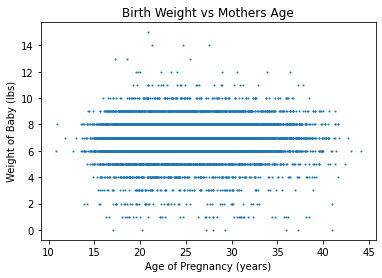

In [3]:
plt.scatter(x = df['agepreg'], y = df['birthwgt_lb'], alpha = 1, s = 1);
plt.xlabel("Age of Pregnancy (years)");
plt.ylabel("Weight of Baby (lbs)");
plt.title("Birth Weight vs Mothers Age");
plt.plot();

This doesn't match the sample solution, so I'll introduce some jitter into the data

In [57]:
def rand_jitter(array):
    stdev = .005 * (max(array) - min(array))
    return array + (np.random.randn(len(array)) * stdev)

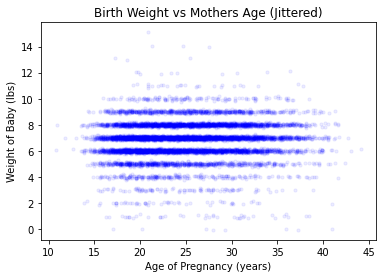

In [58]:
plt.scatter(x = df['agepreg'], y = rand_jitter(df['birthwgt_lb']), color = "blue", alpha = 0.07, s = 10);
plt.xlabel("Age of Pregnancy (years)");
plt.ylabel("Weight of Baby (lbs)");
plt.title("Birth Weight vs Mothers Age (Jittered)");
plt.plot();

**Plot percentiles of birth weight vs mother's age.**

This is probably a silly way to do this

    

In [53]:
lower_range = []
middle_range = []
upper_range = []

bin = 5

for i in np.arange(10,45,bin):
    temp = df[df['agepreg'] >= i]
    temp = temp[temp['agepreg'] < (i + bin)]
    lower_range.append(np.percentile(rand_jitter(temp['birthwgt_lb']), 25))
    middle_range.append(np.percentile(rand_jitter(temp['birthwgt_lb']), 50))
    upper_range.append(np.percentile(rand_jitter(temp['birthwgt_lb']), 75))


#x = 0
#for i in np.arange(10,45,bin) + (bin/2):
#    print(i, lower_range[x], middle_range[x], upper_range[x])
#    x +=1


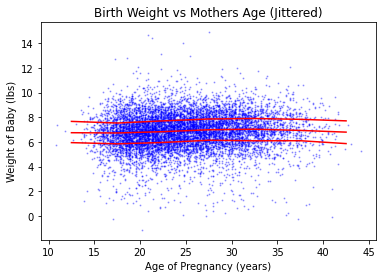

In [54]:
plt.scatter(x = df['agepreg'], y = rand_jitter(df['birthwgt_lb']), color = "blue", alpha = 0.3, s = 1);
plt.plot(np.arange(10,45,bin) + (bin/2), lower_range, color = "red")
plt.plot(np.arange(10,45,bin) + (bin/2), middle_range, color = "red")
plt.plot(np.arange(10,45,bin) + (bin/2), upper_range, color = "red")
plt.xlabel("Age of Pregnancy (years)");
plt.ylabel("Weight of Baby (lbs)");
plt.title("Birth Weight vs Mothers Age (Jittered)");
plt.plot();

**Compute Pearson's and Spearman's correlations.**

In [8]:
np.corrcoef(df['birthwgt_lb'], df['agepreg'])[0][1]

0.06896220171147714

In [9]:
ss.spearmanr(df['birthwgt_lb'], df['agepreg'])[0]

0.09456297534643457

**How would you characterize the relationship between these variables**
<br>

There are no strong correlations between birth weight and age of pregnancy. Our Pearson correlation and Spearman correlation are both very low, indicating no relationship

## Exercise 8-1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [10]:

def sample_mean_function(arr):
    summer = 0
    for i in arr:
        summer += i
    avg = summer / len(arr)
    return avg


def sample_variance_function(arr, mean):
    summer = []
    for i in arr:
        summer.append((i - mean)**2)
    summer = np.array(summer)
    var = np.sum(summer)
    var = var / (len(arr))
    return var


def sample_variance_function_unbiased(arr, mean):
    summer = []
    for i in arr:
        summer.append((i - mean)**2)
    summer = np.array(summer)
    var = np.sum(summer)
    var = var / (len(arr) - 1)
    return var


def root_mean_square_error(estimate, actual):
    mse = np.square(np.subtract(estimate,actual)).mean()
    return mse


number_of_samples = 100
measurements = np.random.randn(1000000)
actual_mean = np.mean(measurements)

x_bar = []
medians = []
biased_vars = []
unbiased_vars =[]


for i in range(1,100001):
    samples = np.random.choice(measurements, size = number_of_samples)
    sample_mean = np.mean(samples)
    x_bar.append(np.mean(samples))
    medians.append(np.median(samples))
    biased = sample_variance_function(samples, sample_mean)
    unbiased = sample_variance_function_unbiased(samples, sample_mean)
    biased_vars.append(biased)
    unbiased_vars.append(unbiased)

x_bar_error = np.mean(x_bar) - actual_mean
median_error = np.mean(medians) - actual_mean
rmse_variance_biased = root_mean_square_error(biased_vars, 1)
rsme_variance_unbiased = root_mean_square_error(unbiased_vars, 1)


print("Mean Error for x_bar",x_bar_error)
print("Mean Error for Median",median_error)

print("RMSE for biased variance",rmse_variance_biased)
print("RMSE for unbiased variance",rsme_variance_unbiased)

Mean Error for x_bar -0.00034790611008969977
Mean Error for Median -0.0008453086751772497
RMSE for biased variance 0.019709142011112228
RMSE for unbiased variance 0.020013374535758837


In [11]:
means_error = []
medians_error = []
bias_vars_error = []
unbiased_vars_error =[]

for i in range(2,1000):
    samples = np.random.choice(measurements, size = i)
    sample_mean = np.mean(samples)
    sample_med = np.median(samples)
    biased = sample_variance_function(samples, sample_mean)
    unbiased = sample_variance_function_unbiased(samples, sample_mean)
    
    means_error.append(sample_mean - actual_mean)
    medians_error.append(sample_med - actual_mean)
    bias_vars_error.append(sample_variance_function(samples,sample_med))
    unbiased_vars_error.append(sample_variance_function_unbiased(samples,sample_med))

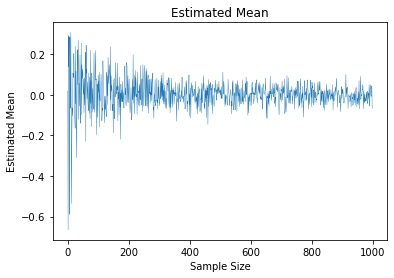

In [12]:
plt.plot(means_error, linewidth = 0.4);
plt.title("Estimated Mean")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean");

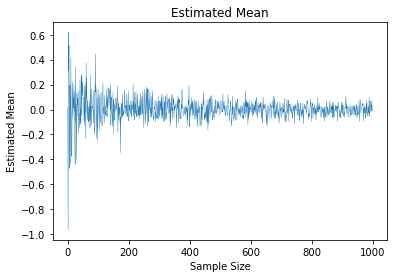

In [13]:
plt.plot(medians_error, linewidth = 0.4);
plt.title("Estimated Mean")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean");

Sample mean and median are about the same with no discernible difference between the two. 

The unbiased variance has a larger standard error than the biased variance.

Increasing the number of samples decreases the standard error between all measurements

## Exercise 8-2
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



Standard Error: 0.6794 
Confidence Intervals: (1.4133: 3.1764)


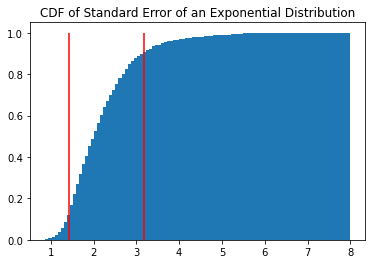

In [23]:
def exp_dist_function(n = 10, lam = 2, shots = 1000, plot = False):
    my_lst = []
    for shot in range(1,shots + 1):
        sample = np.random.exponential(1/lam, n)
        lambda_hat = 1/np.mean(sample)
        my_lst.append(lambda_hat)
    stderr = root_mean_square_error(my_lst, lam)
    my_lst = np.array(my_lst)
    my_lst = np.sort(my_lst)
    if plot == True:
        print("Standard Error: {:.4f} \nConfidence Intervals: ({:.4f}: {:.4f})".format(root_mean_square_error(my_lst,lam), np.percentile(my_lst, 10), np.percentile(my_lst, 90)))
        plt.hist(my_lst, bins = 100, cumulative=True, density = True)
        plt.title("CDF of Standard Error of an Exponential Distribution")
        plt.vlines(np.percentile(my_lst, 90),0,1, color = "red")
        plt.vlines(np.percentile(my_lst, 10),0,1, color = "red")
    return root_mean_square_error(my_lst, lam)
    
data = exp_dist_function(plot = True)

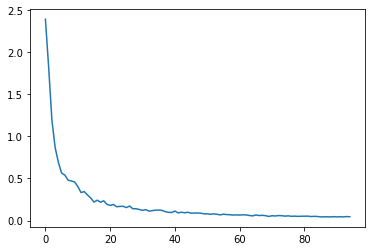

In [24]:
error_list = []

for i in range(5,100):
    dat = exp_dist_function(n = i)
    error_list.append(dat)
plt.plot(error_list);

As the number of samples goes up, the error drops. This is expected since we have more information

